<div class="alert alert-block alert-info" style="margin top:20px">

# ***Advanced Real Estate Valuation with Ensemble Regression***
</div>

In [1]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Importing Dataset

In [2]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)

In [3]:
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#Getting the overall summary
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Wrangling

In [6]:
#Dropping the "id" and "Unnamed: 0" columns as they don't provide us any useful information
df.drop(df[["id","Unnamed: 0"]],axis=1,inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.shape

(21613, 20)

In [8]:
#Checking if there are any null values in the dataset
df.isnull().sum().to_frame()

,0
date,0
price,0
bedrooms,13
bathrooms,10
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [9]:
#Checking and calculating if there are any missing values in the columns "bedrooms" and "bathrooms"
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 13
Number of NaN values for the column bathrooms : 10


In [10]:
#DATA PREPROCESSING
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

C:\Users\darsh\AppData\Local\Temp\ipykernel_17824\1553967349.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)


In [11]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

C:\Users\darsh\AppData\Local\Temp\ipykernel_17824\1207139423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan,mean, inplace=True)


In [12]:
#Confirmation
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [13]:
#Exploratory Data Analysis
print(max(df["price"]))
print(min(df['price']))

7700000.0
75000.0


In [14]:
bins=np.linspace(min(df['price']),max(df["price"]),6)
group_names=["Very-low price","low-price","medium","high-price","very-high price"]
df["Price-binned"]=pd.cut(df["price"],bins,labels=group_names,include_lowest=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price-binned
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Very-low price
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Very-low price
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Very-low price
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Very-low price
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Very-low price


In [15]:
#Creating a column of normalized price to get an overview of the price for each house
df["Normalized-price"]=((df["price"]-df["price"].min())/(df["price"].max()-df["price"].min())).astype(float)

In [16]:
unique_floors=df["floors"].value_counts()
unique_floors_df=unique_floors.to_frame()
unique_floors_df.head()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161


## Descriptive Statistics

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price-binned,Normalized-price
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Very-low price,0.019266
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Very-low price,0.060721
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Very-low price,0.013770
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Very-low price,0.069377
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Very-low price,0.057049


In [18]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Price-binned', 'Normalized-price'],
      dtype='object')

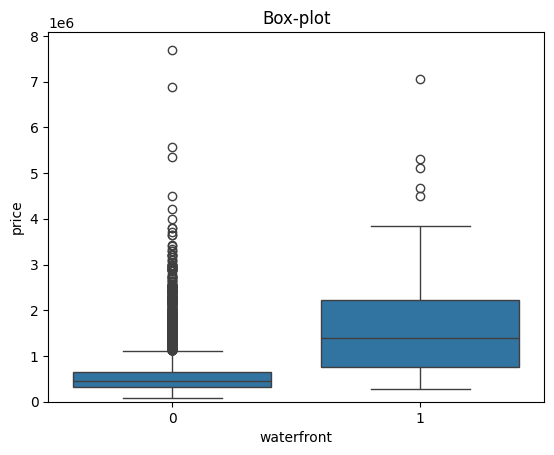

In [19]:
sns.boxplot(x="waterfront",y="price",data=df)
plt.ylim(0,)
plt.title("Box-plot")
plt.show()

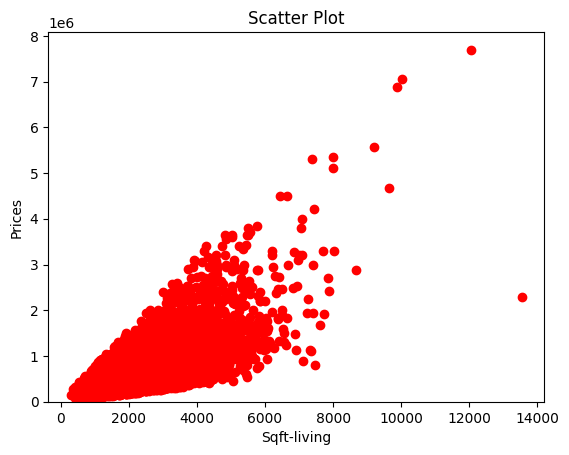

In [20]:
plt.scatter(x=df["sqft_living"],y=df["price"],color="r")
plt.ylim(0,)
plt.title("Scatter Plot")
plt.xlabel("Sqft-living")
plt.ylabel("Prices")
plt.show()

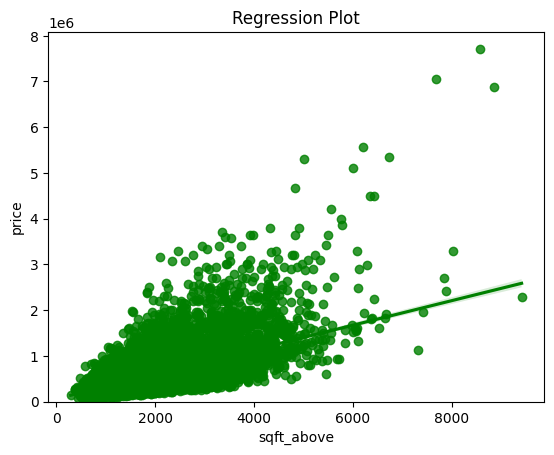

In [21]:
sns.regplot(x="sqft_above",y="price",data=df,color="g")
plt.ylim(0,)
plt.title("Regression Plot")
plt.show()

## Model Development

The predicted values are :  [537658.05923445 534162.64042347 539011.12458064 529990.68893939
 549610.13645911 551865.24536942 533711.61864141 534388.1513145
 533147.84141383 550399.42457772]

The R-Squared value for the model is :  0.00046769430149007363


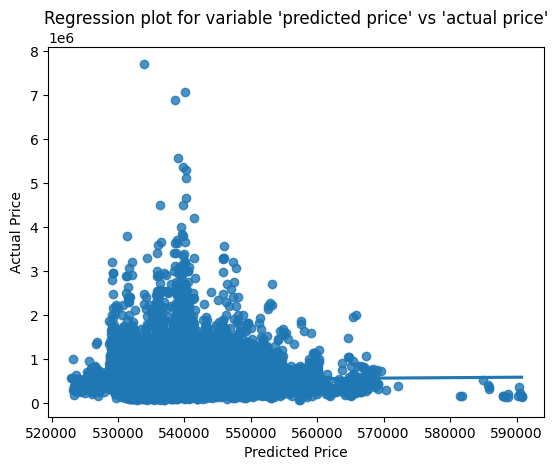

In [22]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
yhat=lm.predict(X)
print("The predicted values are : ", yhat[0:10])
print("\nThe R-Squared value for the model is : ",lm.score(X, Y))
#Since the plot will be of two dimensions, we can plot it here!
sns.regplot(x=yhat, y=Y)
plt.title("Regression plot for variable 'predicted price' vs 'actual price'")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

The predicted values are :  [537658.05923445 534162.64042347 539011.12458064 529990.68893939
 549610.13645911 551865.24536942 533711.61864141 534388.1513145
 533147.84141383 550399.42457772]

The R-squared for condition is  0.4928532179037931


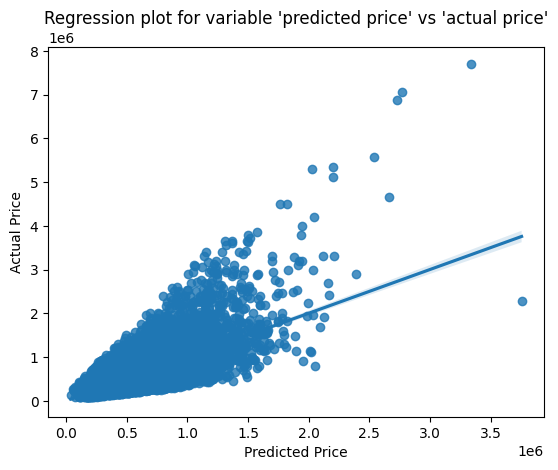

In [23]:
X2=df[["sqft_living"]]
lm.fit(X2,Y)
yhat1=lm.predict(X2)
print("The predicted values are : ",yhat[0:10])
print("\nThe R-squared for condition is ",lm.score(X2,Y))
sns.regplot(x=yhat1, y=Y)
plt.title("Regression plot for variable 'predicted price' vs 'actual price'")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

The predicted values are :  [537658.05923445 534162.64042347 539011.12458064 529990.68893939
 549610.13645911 551865.24536942 533711.61864141 534388.1513145
 533147.84141383 550399.42457772]

The R-squared for condition is  0.6576951666037498


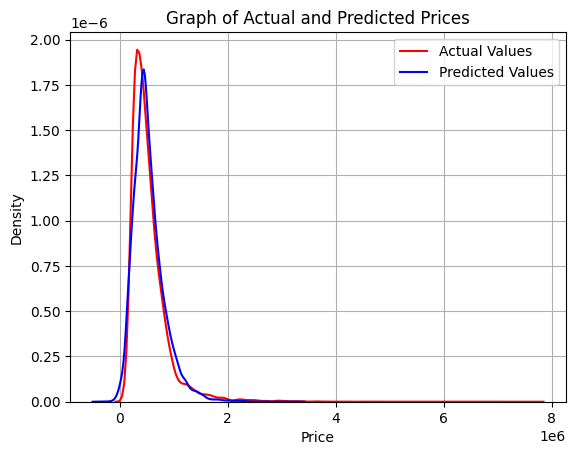

In [24]:
Z=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y=df["price"]
lm1=LinearRegression()
lm1.fit(Z,Y)
yhat2=lm1.predict(Z)
print("The predicted values are : ",yhat[0:10])
print("\nThe R-squared for condition is ",lm1.score(Z,Y))

ax1=sns.kdeplot(df["price"], label="Actual Values", color="r")
sns.kdeplot(yhat2, label="Predicted Values", color="b", ax=ax1)
plt.title("Graph of Actual and Predicted Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


***Double click*** for inference
<!--
The model performs well and accurately predicts values close to the actual ones. This indicates that the Multi Linear Regression Model is a better fit than the Simple Linear Regression Model. 
-->

##### Creating pipeline for simplifying the steps of processing the data

In [25]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [26]:
from sklearn.metrics import r2_score
pipe=Pipeline(Input)
pipe.fit(Z,Y)
yhat=pipe.predict(Z)
print("R^2 value = ",r2_score(Y,yhat))

R^2 value =  0.7513408515988734


## Model Evaluation and Refinement

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [28]:
#Splitting the data into training and testing sets
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of training samples:",x_train.shape[0])
print("number of test samples:", x_test.shape[0])

number of training samples: 18371
number of test samples: 3242


In [29]:
#Ridge regression
from sklearn.linear_model import Ridge

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Assuming x_train and y_train are your training data

parameters = [{"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
RR = Ridge()
Grid = GridSearchCV(RR, parameters, cv=4)
Grid.fit(x_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("The value of hyperparameter for which the error is least is :", Grid.best_params_)


The value of hyperparameter for which the error is least is : {'alpha': 0.001}


In [31]:
RidgeModel=Ridge(alpha=0.001)
RidgeModel.fit(x_train,y_train)
yhat=RidgeModel.predict(x_test)
print("R^2 value = ",r2_score(y_test,yhat))

R^2 value =  0.6478833434781139


In [32]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
RidgeModel2=Ridge(alpha=0.001)
RidgeModel2.fit(x_train_pr,y_train)
yhat2=RidgeModel2.predict(x_test_pr)
R2_value= r2_score(y_test, yhat2)
print("R^2 value = ", R2_value)

R^2 value =  0.7075921176103012


In [3]:
s="darshan"
res=int(0)
for i in range(len(s)):
    res=res+ord(res[i])
print(res)

TypeError: 'int' object is not subscriptable

In [4]:
ord("d")

100